In [8]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [9]:
#Import csv as dataset
chocbar_df = pd.read_csv("../data/chocolate_bars.csv")
chocbar_df


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [10]:
chocbar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [17]:
#Function for counting value amounts and sorting
def valcount_and_sort(column_name):
    column_name = chocbar_df[column_name].value_counts().sort_index()
    return column_name
print(valcount_and_sort('year_reviewed'))

2006     62
2007     73
2008     92
2009    123
2010    110
2011    163
2012    194
2013    183
2014    247
2015    284
2016    217
2017    105
2018    228
2019    193
2020     81
2021    175
Name: year_reviewed, dtype: int64


In [180]:
#top ten highest rated chocolate bars
topten_rated = chocbar_df[['bar_name','rating', 'review']].sort_values('rating', ascending=False).head(10)

topten_rated



,bar_name,rating,review
1829,"Piura, Choc. Garage Exclusive",4.0,"creamy, cocoa, grapes"
575,"Bejofo, 2019 H., Batch 20",4.0,"cherry, perfectly balanced roast"
150,Tumaco,4.0,"smooth, nutty, cocoa"
2389,Manjari,4.0,"creamy, blueberry, raspberry"
2047,Asante,4.0,"simple, delicate cocoa, long"
491,"Chuao, batch 1089",4.0,"mild strawberry, cocoa, acidic"
490,"Valle de Los Rios, batch 990",4.0,"complex, strawberry, floral"
2051,San Juan de Cheni,4.0,"banana, pear, spice, cheese"
486,"Maya Mtn, Batch 454, Heirloom",4.0,"bright fruit, molasses, nutty"
170,Haiti,4.0,"nuts, butterscotch, brownie"


In [18]:
# chocbar_df['rating'].value_counts().sort_index(ascending=False)
print(valcount_and_sort('rating'))

1.00      4
1.50     10
1.75      3
2.00     33
2.25     17
2.50    166
2.75    333
3.00    523
3.25    464
3.50    565
3.75    300
4.00    112
Name: rating, dtype: int64


In [157]:
#bottom ten by rating
low_ten = chocbar_df[['bar_name','rating', 'review']].sort_values('rating').head(10)

low_ten

,bar_name,rating,review
632,Sensations Intense,1.0,this is not chocolate
590,"Principe, Sao Tome & Principe",1.0,"chalky, musty, very bitter"
1679,Dark,1.0,"pastey, strong off flavor"
430,Baking,1.0,"bitter, cocoa"
1587,Houseblend,1.5,"chemical, salt, wtf"
626,Ecuador Puristique,1.5,high intensity bitter
2017,100 percent,1.5,"sticky, intense, very bitter"
426,Pichincha,1.5,"klingy, hint of fruit, very bitter"
323,"El Oro, Hacienda de Oro",1.5,"cardboard, very bitter, floral"
2118,Ghana,1.5,"perfume, strong chemical"


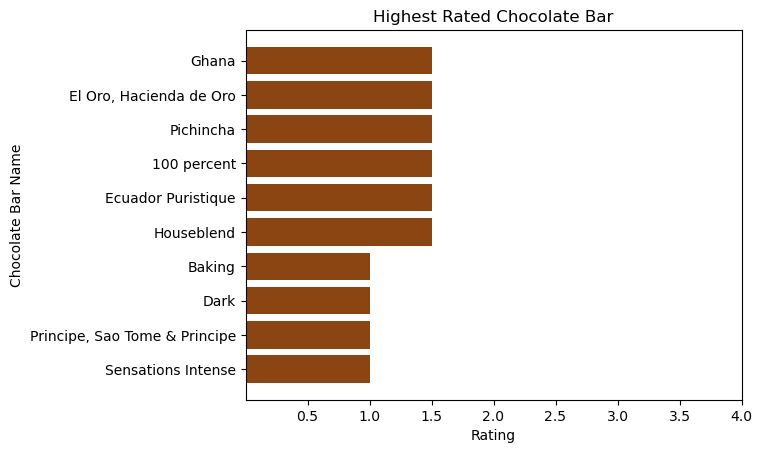

In [233]:
#Graphing lowest rated chocolate bars
from array import array


fig, ax = plt.subplots()
bar_name = low_ten['bar_name']
rating = low_ten['rating']


plt.barh(bar_name, rating, color= ('saddlebrown'))
plt.yticks(bar_name, horizontalalignment='right', fontsize='10')
plt.ylabel("Chocolate Bar Name")
plt.xlabel("Rating")
plt.title("Highest Rated Chocolate Bar")
plt.xticks(ticks=(.5,1,1.5,2,2.5,3,3.5,4))

plt.show()
# plt.savefig('../images/Lowest Rated Chocolate Bar.jpeg')

In [54]:
#Sorting the manufacturer by rating
man_rated = chocbar_df[['manufacturer', 'rating']].sort_values('rating')
# man_rated

In [237]:
#Which manufacturer has the highest overall (cumulative) rating?
top_man = (
    man_rated
        .groupby(by='manufacturer')
        .sum()
        .sort_values(by='rating', ascending=False)
)
hi_man = top_man.head(10)
hi_man


,rating
manufacturer,
Soma,201.00
Fresco,133.25
Arete,113.00
Bonnat,104.00
A. Morin,89.00
Dandelion,82.50
Domori,80.50
Pralus,79.50
Valrhona,73.00


In [240]:
#Which manufacturer has the lowest raiting?
lo_man = top_man.tail(10)


In [244]:
hilo_man = hi_man.append(lo_man)
hilo_man

,rating
manufacturer,
Soma,201.00
Fresco,133.25
Arete,113.00
Bonnat,104.00
A. Morin,89.00
Dandelion,82.50
Domori,80.50
Pralus,79.50
Valrhona,73.00


In [53]:
#Sort by bean origin and rating
bean_rating = (
chocbar_df[['bean_origin', 'rating']].sort_values('rating'))
# bean_rating


In [52]:
#Sorted beans by origin and cumulative rating
top_bean = (
    bean_rating
    .groupby(by='bean_origin')
    .sum()
    .sort_values(by='rating', ascending=False)
)
top_bean

,rating
bean_origin,
Venezuela,817.50
Peru,780.25
Dominican Republic,726.75
Ecuador,693.00
Madagascar,578.25
...,...
DR Congo,3.00
Burma,3.00
St.Vincent-Grenadines,2.75
